# Histogram

An histogram is an accurate graphical representation of the distribution of numerical data. It takes as input one numerical variable only. The variable is cut into several bins, and the

number of observation per bin is represented by the height of the bar. Note that the shape of the histogram can be really different following the number of bins you set. Thus, try different

values before taking any conclusion. Note that it is really close to [density plot](http://python-graph-gallery.com/density-plot/). To compare several distributions, add them on the same axis or use [violinplots](http://python-graph-gallery.com/violin-plot/).

## Overview
1. Data Source
2. Basic histogram
3. Control Rug and Density
4. Vertical Histogram
5. Histogram with a Boxplot on top
6. Histogram with several variables
    - 6.1 Overlap Distributions
    - 6.2 Windows Distribution
    - 6.3 Windows Distribution - Boxplot
7. Marginal plot
    - 7.1 Central Plot
    - 7.2 Marginal
    - 7.3 Ratio

## 1. Data Source

In [1]:
import seaborn as sns
df = sns.load_dataset('iris')
df.shape

(150, 5)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


##  2. Basic histogram
With Seaborn, histograms are made using the __distplot__ function. You can call the function with default values (left), what already gives a nice chart. Do not forget to play with the number of bins using the ‘__bins__’ argument. It is important to do so: a pattern can be hidden under a bar. Here is the code:

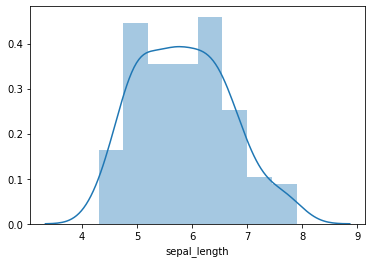

In [4]:
# Import library and dataset
import seaborn as sns
df = sns.load_dataset('iris')

# Make default histogram of sepal length
sns.distplot(df["sepal_length"])

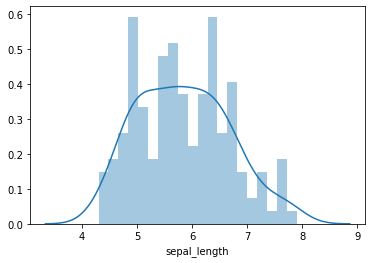

In [5]:
# Control the number of bins
sns.distplot(df["sepal_length"], bins=20)

## 3. Control Rug and Density
By default, the __displot__ function of seaborn plots an histogram with a density curve (2. Basic histogram). You can easily remove the density using the option __kde=”False”__. You can also control the presence of rugs using __rug=”True”__. You can custom rug and density as proposed below:

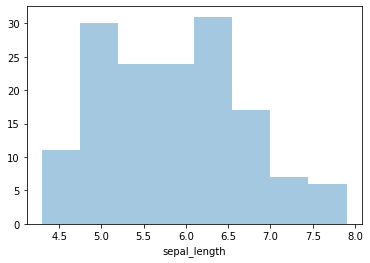

In [6]:
# Import library and dataset
import seaborn as sns
df = sns.load_dataset('iris')

# Hist only
sns.distplot(a=df["sepal_length"], 
             hist=True, 
             kde=False, 
             rug=False)

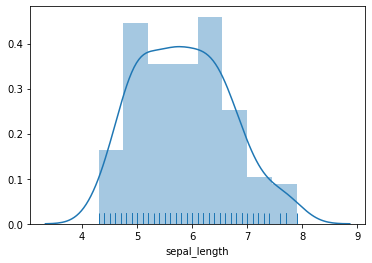

In [7]:
# Hist + Rug + kernel density
sns.distplot(a=df["sepal_length"], 
             hist=True, 
             kde=True, 
             rug=True)

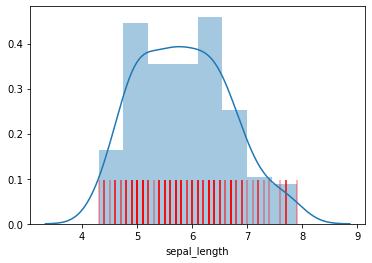

In [8]:
# To change parameters of rug: rug_kws=rugplot()
sns.distplot(a=df["sepal_length"], 
             rug=True,
             rug_kws={"color": "r", "alpha":0.3, "linewidth": 2, "height":0.2}
            )

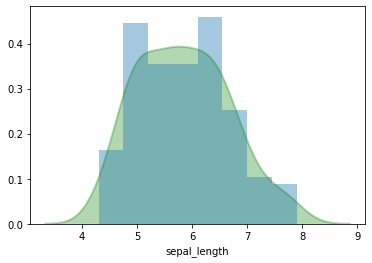

In [9]:
# To change parameters of density distribution
sns.distplot(a=df["sepal_length"], 
             kde=True,
             kde_kws={"color": "g", "alpha":0.3, "linewidth": 2, "shade":True}
            )

## 4. Vertical Histogram
It is quite straightforward to make your histogram vertical with seaborn, just add vertical=True as an option.

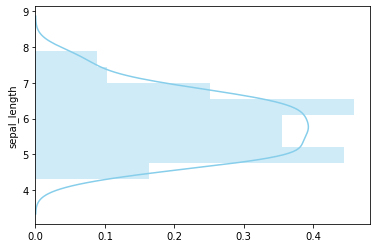

In [10]:
# Import library and dataset
import seaborn as sns
df = sns.load_dataset('iris')

# Vertical hist
sns.distplot(df["sepal_length"], 
             color="skyblue", 
             vertical=True)

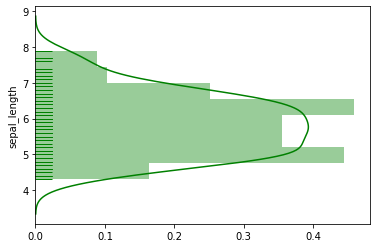

In [11]:
# Hist + Rug + kernel density
sns.distplot(a=df["sepal_length"], 
             hist=True, 
             kde=True, 
             rug=True,
             color="green", 
             vertical=True)

## 5. Histogram with a Boxplot on top
This chart is mainly based on __seaborn__ but necessitates __matplotlib__ as well, to split the graphic window in 2 parts.

[Text(0.5, 0, 'Boxplot Distribution')]

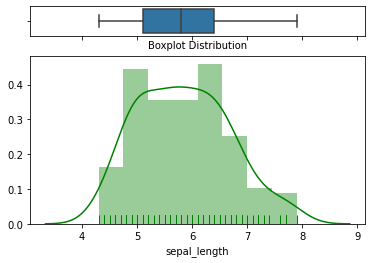

In [12]:
# Import library and dataset
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(df["sepal_length"], ax=ax_box)
sns.distplot(df["sepal_length"], ax=ax_hist, kde=True, rug=True, color='green')

# Remove x axis name for the boxplot
ax_box.set(xlabel='Boxplot Distribution')

## 6. Histogram with several variables
If you have several numeric variables and want to visualize their distributions together, you have 2 options: plot them on the same axis (__Overlap Distributions__), or split your windows in several parts (__Windows Distribution__). The first option is nicer if you do not have too many variable, and if they do not overlap much.

### 6.1 Overlap Distributions

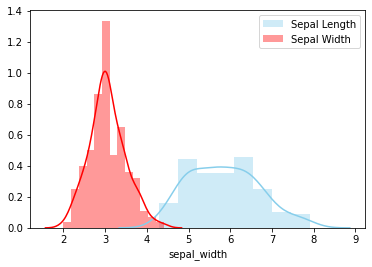

In [13]:
# Import library and dataset
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')

# Method 1: on the same Axis
sns.distplot(df["sepal_length"], color="skyblue", label="Sepal Length")
sns.distplot(df["sepal_width"], color="red", label="Sepal Width")
plt.legend()
plt.show()

In [14]:
### 6.2 Windows Distribution

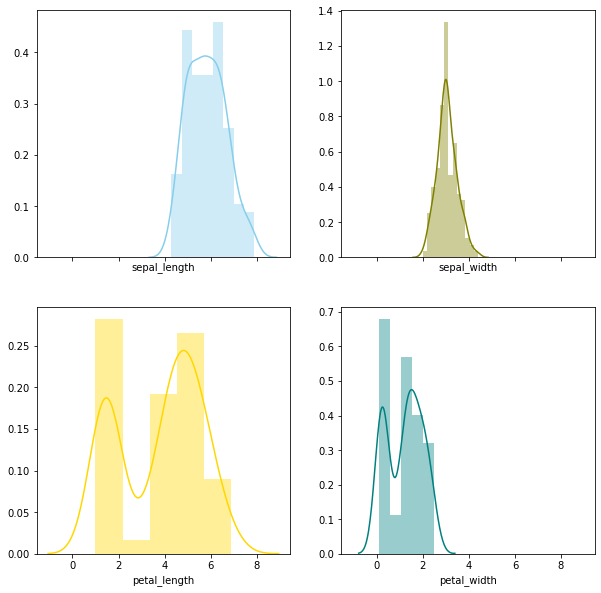

In [15]:
# library and data
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')

# plot
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)

sns.distplot(df["sepal_length"], color="skyblue", ax=axes[0, 0])
sns.distplot(df["sepal_width"], color="olive", ax=axes[0, 1])
sns.distplot(df["petal_length"], color="gold", ax=axes[1, 0])
sns.distplot(df["petal_width"], color="teal", ax=axes[1, 1])

### 6.2 Windows Distribution - Boxplot

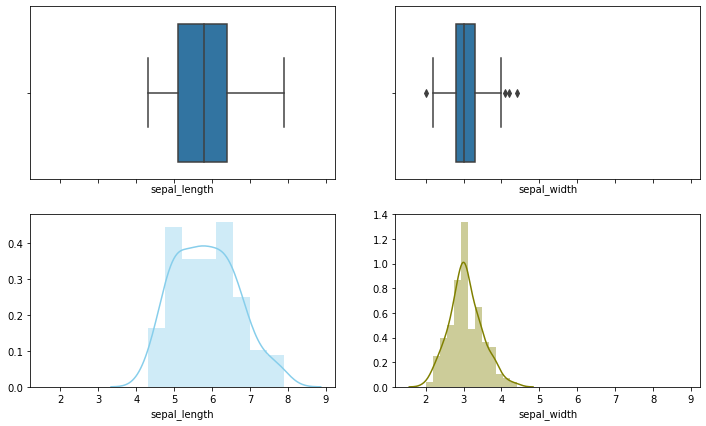

In [16]:
# library and data
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')

# plot
f, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True)

# Cut the window in 2 parts
#f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df["sepal_length"], ax=axes[0, 0])
sns.distplot(df["sepal_length"], color="skyblue", ax=axes[1, 0])

sns.boxplot(df["sepal_width"], ax=axes[0, 1])
sns.distplot(df["sepal_width"], color="olive", ax=axes[1, 1])


## 7. Marginal plot
A marginal plot allows to study the relationship between 2 numeric variables. The central chart display their __correlation__. It is usually a scatterplot, a hexbin plot, a 2D histogram or a 2D density plot. The marginal charts, usually at the top and at the right, show the __distribution__ of the 2 variables using histogram or density plot.

The seaborn library provides a joint plot function that is really handy to make this type of graphic. The top graph shows it default behaviour, and here are a few possible customizations. Seaborn has a nice documentation and some of these examples come from there.

### 7.1 Central Plot

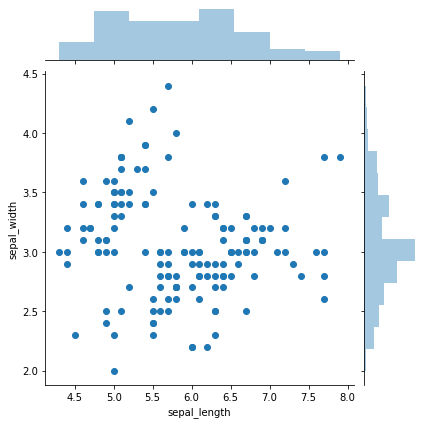

In [17]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='scatter')


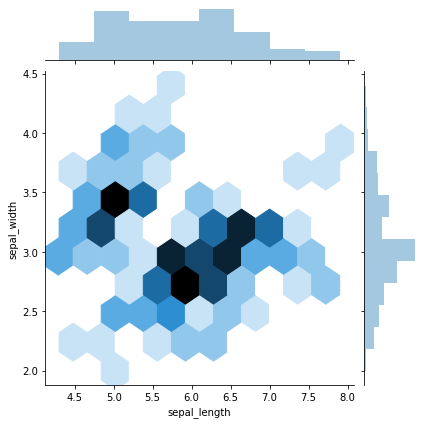

In [18]:
sns.jointplot(x=df["sepal_length"], 
              y=df["sepal_width"], 
              kind='hex')

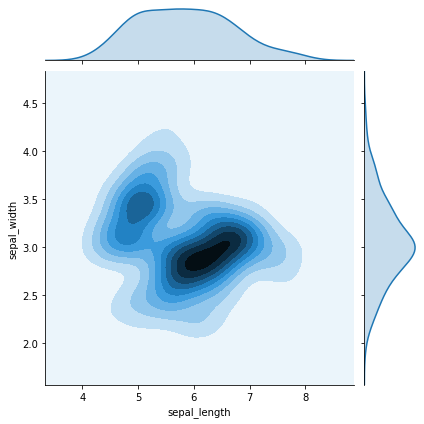

In [19]:
sns.jointplot(x=df["sepal_length"], 
              y=df["sepal_width"], 
              kind='kde')

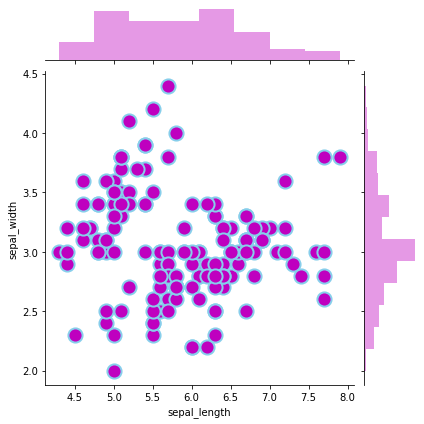

In [20]:
# Then you can pass arguments to each type:
sns.jointplot(x=df["sepal_length"], 
              y=df["sepal_width"], 
              kind='scatter', 
              s=200, 
              color='m', 
              edgecolor="skyblue", 
              linewidth=2)

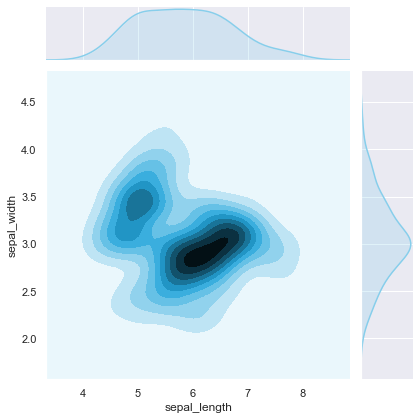

In [21]:
# Custom the color
sns.set(style="darkgrid", color_codes=True)
#style: {white, dark, whitegrid, darkgrid, ticks}
sns.jointplot(x=df["sepal_length"], 
              y=df["sepal_width"], 
              kind='kde', 
              color="skyblue")

### 7.2 Marginal

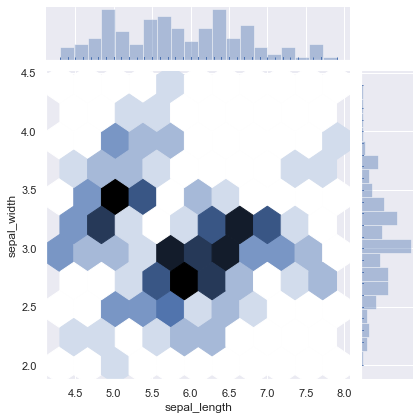

In [22]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

# Custom the histogram and add rug:
sns.jointplot(x=df["sepal_length"], 
              y=df["sepal_width"], 
              kind='hex',
              marginal_kws=dict(bins=20, rug=True))

### 7.3 Ratio

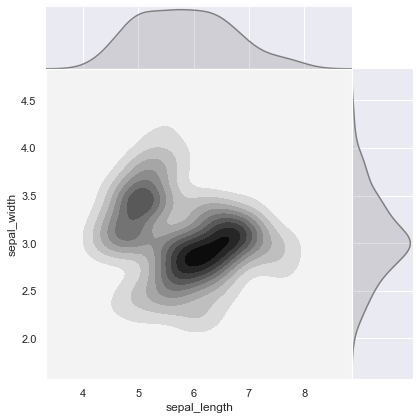

In [23]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

# No space
sns.jointplot(x=df["sepal_length"], 
              y=df["sepal_width"], 
              kind='kde', 
              color="grey", 
              space=0)

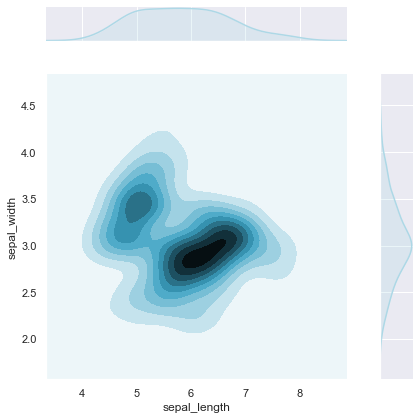

In [24]:
# Huge space
sns.jointplot(x=df["sepal_length"], 
              y=df["sepal_width"], 
              kind='kde', 
              color="lightblue", 
              space=1)

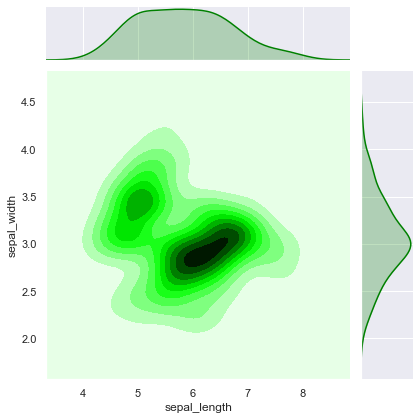

In [25]:
# Make marginal bigger:
sns.jointplot(x=df["sepal_length"], 
              y=df["sepal_width"], 
              kind='kde',
              color="green", 
              ratio=5)